In [1]:
import os

import numpy as np
import json
import collections

import matplotlib.pyplot as plt

In [2]:
Chain = collections.namedtuple("Chain", ["chain", "values"])

### Load reference data

In [8]:
REFERENCE_FOLDER = "/home/max/Downloads/emd-12665-bws"
CONVERTED_FILE = "/home/max/Documents/val-server/EMV-Script-fork/emv-tools/data/converted.json"

files = os.listdir(REFERENCE_FOLDER)
files

['mapValidation-chain-a.json',
 'mapValidation-chain-d.json',
 'emd-12665-chain-b.json',
 'mapValidation-chain-c.json',
 'emd-12665-chain-e.json']

In [9]:
def create_array(data):
    size = data[-1][1]
    values = np.zeros([size])

    for (start, end, val) in data:
        values[start : end + 1] = val

    return values

def load_bws_json(path):
    with open(path) as f:
        local_res = [r for r in json.load(f) if r['track_name'] == "Validation - Local Resolution"][0]


    local_res["chain"]
    data = [
        (e["begin"], e["end"], float(e["description"].split(":")[-1]))
        for e in local_res["data"]
        if e["type"].startswith("DeepRes")
    ]


    values = create_array(data)

    return Chain(local_res["chain"], values)

In [10]:
reference = [load_bws_json(f"{REFERENCE_FOLDER}/{p}") for p in os.listdir(REFERENCE_FOLDER)]
reference = {r.chain: r for r in reference}

reference

{'A': Chain(chain='A', values=array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 5.91, 5.56, 5.33, 5.55, 5.56,
        5.86, 5.34, 5.64, 5.62, 5.47, 5.38, 5.18, 5.26, 5.25, 5.26, 5.44,
        5.55, 5.23, 5.09, 5.24, 5.37, 5.23, 5.49, 5.25, 5.02, 5.23, 5.34,
        5.33, 5.42, 5.62, 5.98, 6.01, 6.21, 6.04, 6.23, 6.67, 6.08, 6.04,
        6.27, 6.43, 6.28, 6.01, 6.07, 6.39, 6.1 , 6.22, 6.07, 5.93, 5.81,
        5.66, 5.68, 5.83, 5.89, 6.06, 5.92, 6.17, 6.27, 5.7 , 6.17, 6.22,
        6.12, 6.06, 5.83, 5.75, 5.62, 5.54, 6.17, 6.22, 5.88, 5.96, 5.85,
        6.04, 5.82, 6.26, 6.23, 5.85, 6.02, 6.73, 6.11, 5.66, 5.59, 6.22,
        5.94, 5.89, 5.66, 6.11, 6.49, 5.99, 5.95, 6.58, 6.31, 6.49, 6.28,
        6.98, 6.76, 6.08, 5.8 , 5.31, 5.24, 5.56, 6.14, 5.9 , 5.52, 5.61,
        6.15, 6.19, 6.42, 7.03, 6.94, 6.51, 6.12, 6.77, 6.86, 6.4 , 6.8 ,
        7.2 , 7.32, 6.8 , 7.25, 7.76, 7.26, 6.53, 7.54, 6.9 , 6.91, 6.14,
        5.67, 5.99, 5.87, 5.76, 5.97, 5.51, 5.53, 5.91, 5.3 , 5.58, 5.88,
        5

In [11]:
with open(CONVERTED_FILE) as f:
    data = json.load(f)

def convert_to_chain(raw_data):
    data = [(r["resSeqNumber"], r["resSeqNumber"], r["scoreValue"]) for r in raw_data["seqData"]]

    values = create_array(data)

    return Chain(raw_data["name"], values)


converted = [convert_to_chain(d) for d in data["chains"]]
converted = {r.chain: r for r in converted}

In [12]:
converted.keys(), reference.keys()

(dict_keys(['E', 'B', 'A', 'D', 'C']), dict_keys(['A', 'D', 'B', 'C', 'E']))

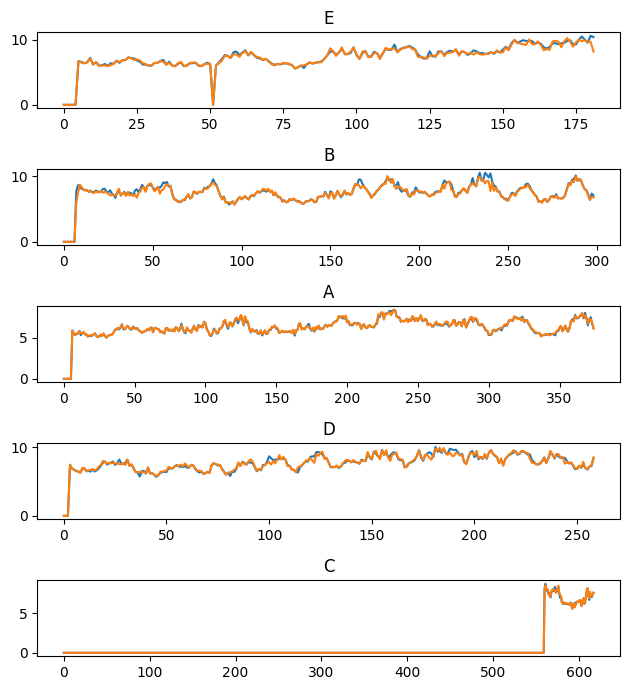

In [13]:
fig, axs = plt.subplots(len(converted.keys()), 1)
fig.set_figheight(7)

for ax, key in zip(axs, converted.keys()):
    ax.set_title(key)

    ax.plot(reference[key].values)
    ax.plot(converted[key].values)

fig.tight_layout()